In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Load dataset
df = pd.read_csv("heart_augmented_2000_processed.csv")

# Display basic info
print(df.head())
print(df.info())
print(df['target'].value_counts())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1095 non-null   int64  
 1   sex       1095 non-null   int64  
 2   cp        1095 non-null   int64  
 3   trestbps  1095 non-null   int64  
 4   chol      1095 non-null   int64  
 

In [2]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


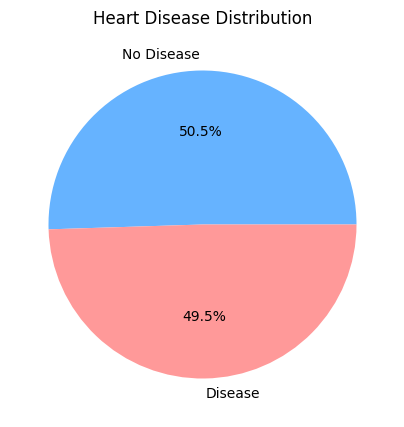

C:\Users\TANISH VERMA\AppData\Local\Temp\ipykernel_9160\3525900362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['#66b3ff','#ff9999'])


Text(0.5, 1.0, 'Heart Disease Count')

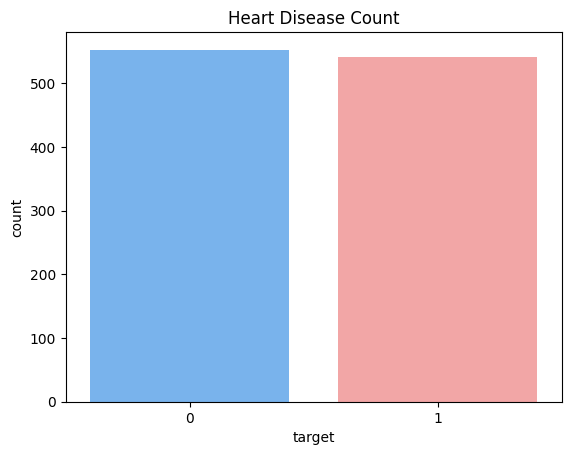

In [3]:
plt.figure(figsize=(5,5))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], labels=['No Disease','Disease'])
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()
sns.countplot(x='target', data=df, palette=['#66b3ff','#ff9999'])
plt.title('Heart Disease Count')

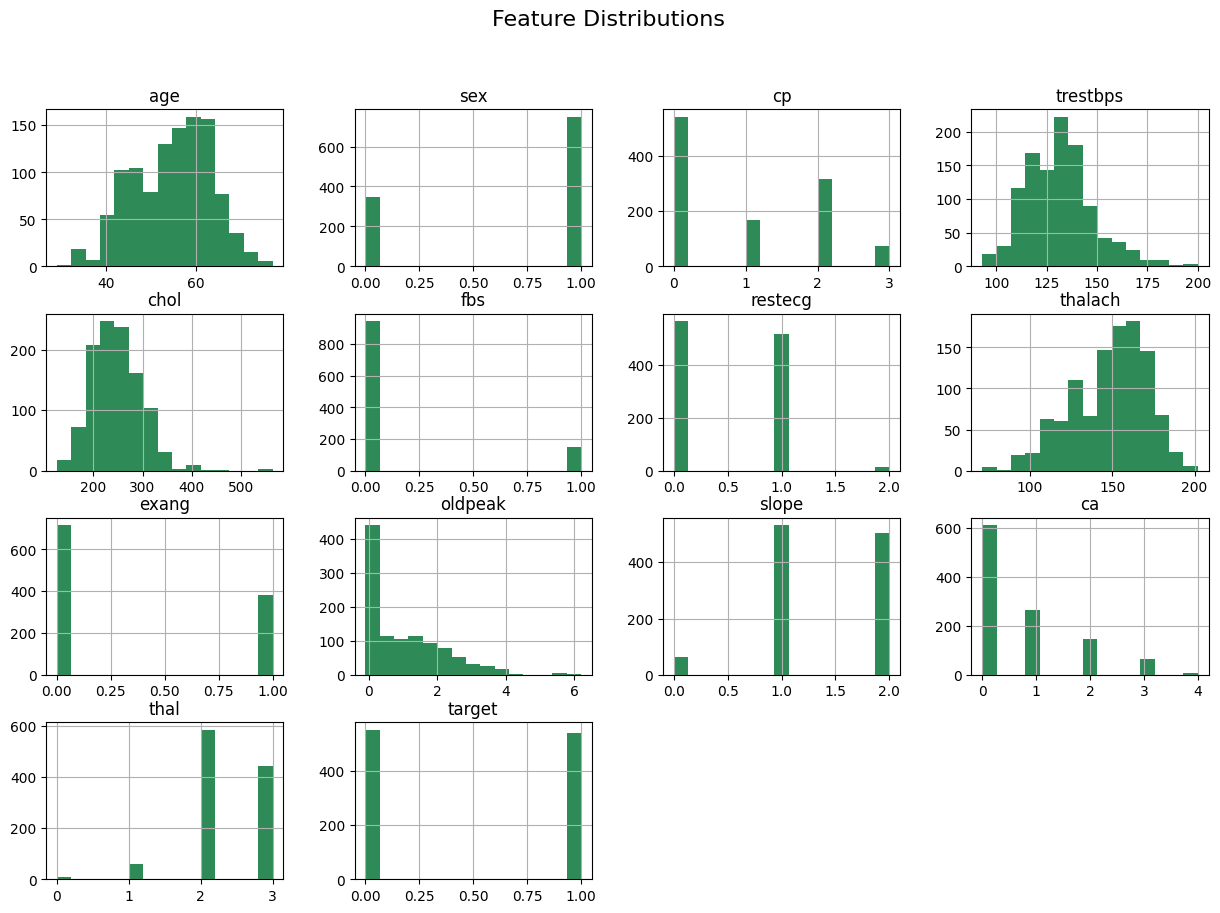

<Figure size 1200x1000 with 0 Axes>

In [4]:
df.hist(figsize=(15,10), bins=15, color='#2E8B57')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()

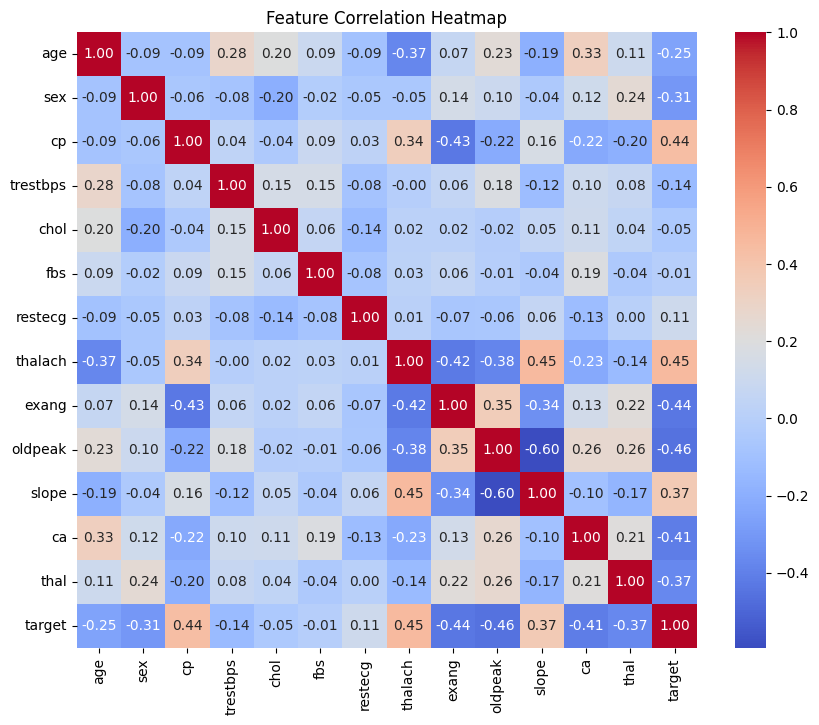

<Figure size 1200x1000 with 0 Axes>

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()

C:\Users\TANISH VERMA\AppData\Local\Temp\ipykernel_9160\4224149874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='Set3')


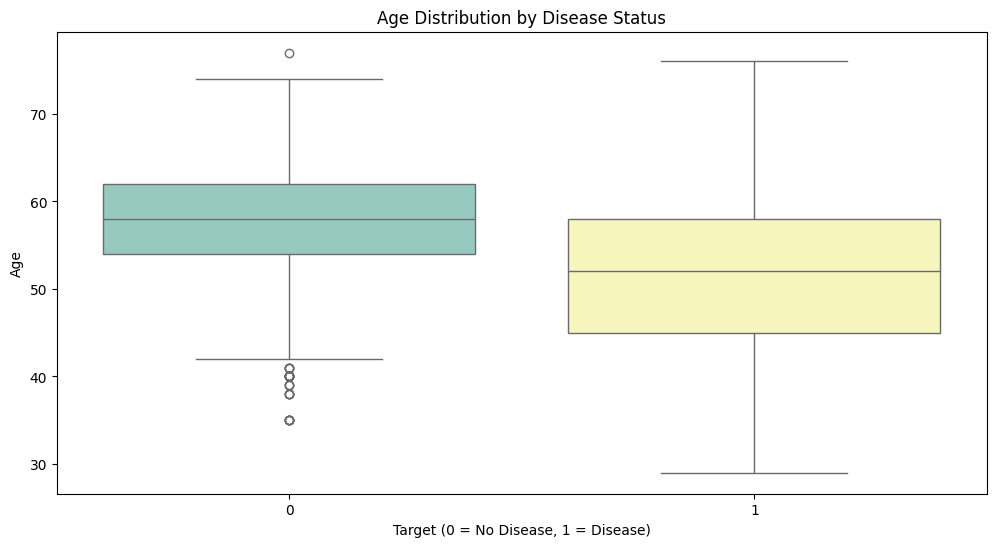

C:\Users\TANISH VERMA\AppData\Local\Temp\ipykernel_9160\4224149874.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='coolwarm')


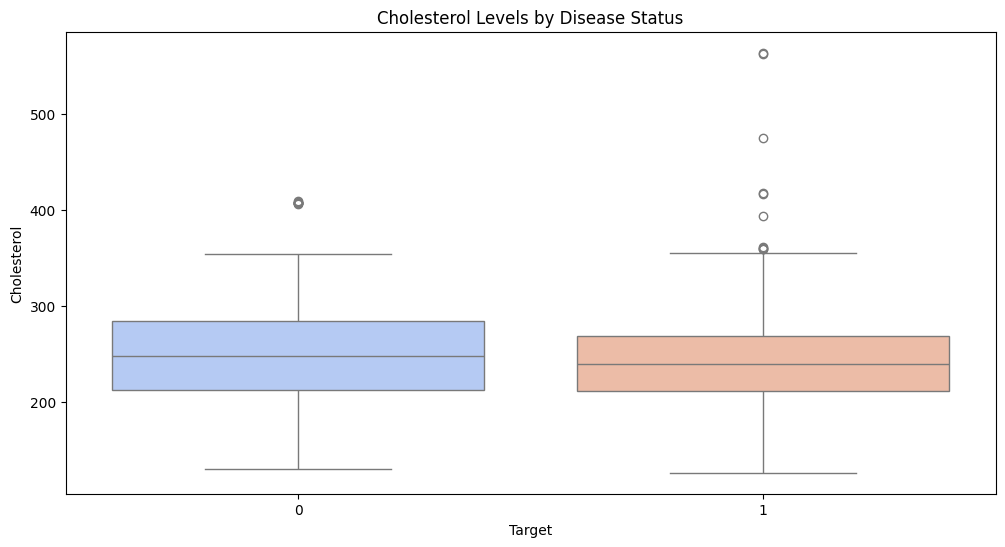

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='target', y='age', data=df, palette='Set3')
plt.title('Age Distribution by Disease Status')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='target', y='chol', data=df, palette='coolwarm')
plt.title('Cholesterol Levels by Disease Status')
plt.xlabel('Target')
plt.ylabel('Cholesterol')
plt.show()


In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
from sklearn.model_selection import GridSearchCV

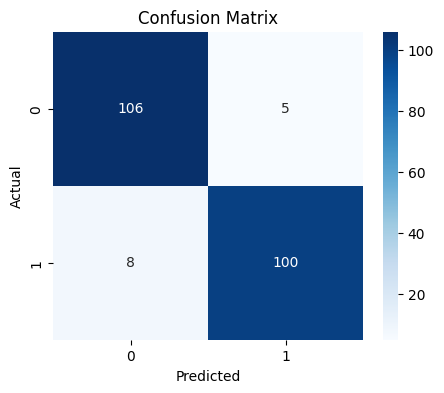

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

C:\Users\TANISH VERMA\AppData\Local\Temp\ipykernel_9160\2892638884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


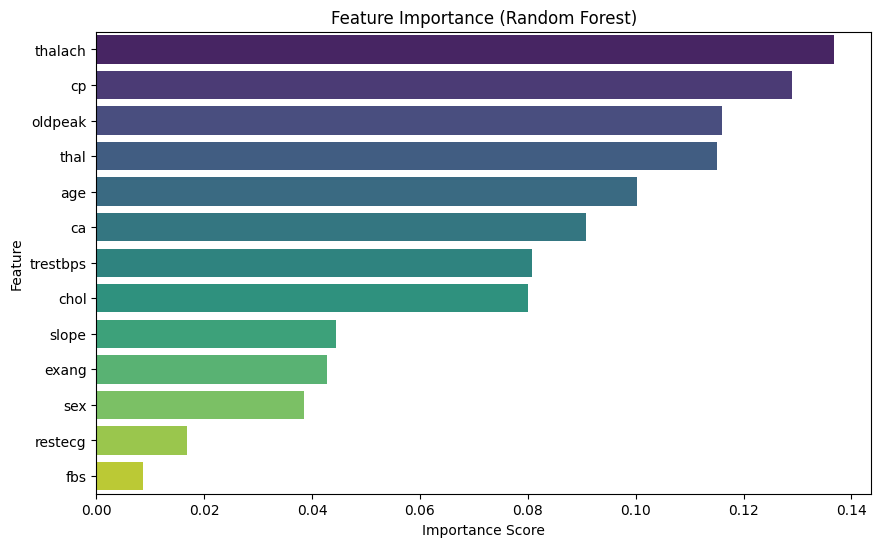

In [9]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


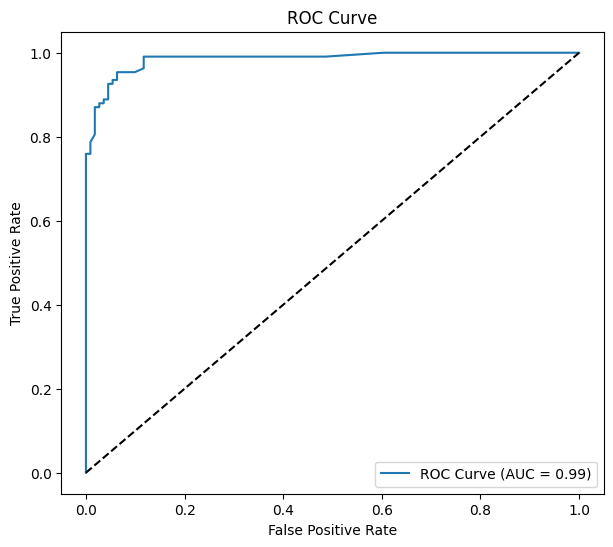

In [10]:
y_pred_prob = rf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
